<a href="https://colab.research.google.com/github/ryanpseely/reu_nsf/blob/main/reu_nsf_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSF Awards & Political Interference

Analysis of how politics may interfere with the type and amount of awards given by the NSF to researchers

Note on GitHub syncing: Using Colab with GitHub is NOT like RMarkdown files and GitHub Desktop. To "push" changes to GitHub, I must do the following steps...
1. File > Save a copy in GitHub
2. Choose the reu_nsf repository
3. Write a commit message
4. Click "OK" when ready to commit the changes.

## Merging, Cleaning, Exploring Data

In [64]:
import pandas as pd

In [65]:
# Data set stored in GitHub: Import into a Pandas data frame
# Changed the URL to point to the raw CSV data instead of the GitHub page
csv_file_24 = "https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/Awards_JanMar24.csv"

award_data_24 = pd.read_csv(csv_file_24, encoding='latin1')

csv_file_25 = "https://raw.githubusercontent.com/ryanpseely/reu_nsf/main/Awards_JanMar25.csv"

award_data_25 = pd.read_csv(csv_file_25, encoding='latin1')

In [66]:
award_data_24.columns # Show the list of variables in the file

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [67]:
award_data_25.columns

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract'],
      dtype='object')

In [68]:
print(len(award_data_24))
print(len(award_data_25))

1225
788


In [69]:
award_data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AwardNumber              1225 non-null   int64 
 1   Title                    1225 non-null   object
 2   NSFOrganization          1225 non-null   object
 3   Program(s)               1225 non-null   object
 4   StartDate                1225 non-null   object
 5   LastAmendmentDate        1225 non-null   object
 6   PrincipalInvestigator    1225 non-null   object
 7   State                    1225 non-null   object
 8   Organization             1225 non-null   object
 9   AwardInstrument          1225 non-null   object
 10  ProgramManager           1225 non-null   object
 11  EndDate                  1225 non-null   object
 12  AwardedAmountToDate      1225 non-null   object
 13  Co-PIName(s)             368 non-null    object
 14  PIEmailAddress           1225 non-null  

In [70]:
award_data_24.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationStreet,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,200 CENTRAL PARK W,NEW YORK,NY,100245102,2127695975,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,365 5TH AVE STE 8113,NEW YORK,NY,100164309,2128177526,GEO,157500,9250,$0.00,This award provides renewed funding for underg...
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,3100 MARINE ST,Boulder,CO,803090001,3034926221,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,6100 MAIN ST,Houston,TX,770051827,7133484820,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,58 EDGEWOOD AVE NE,ATLANTA,GA,303032921,4044133570,GEO,157500,9250,$0.00,Georgia State University will host the Communi...


In [71]:
# Remove commas, dollar signs
award_data_24['AwardedAmountToDate'] = award_data_24['AwardedAmountToDate'].str.replace('[\$,]', '', regex=True)
award_data_25['AwardedAmountToDate'] = award_data_25['AwardedAmountToDate'].str.replace('[\$,]', '', regex=True)


In [72]:
award_data_25['AwardedAmountToDate'].head()

,AwardedAmountToDate
0,190000.00
1,85950.00
2,190000.00
3,110000.00
4,110000.00


In [73]:
award_data_24['AwardedAmountToDate'].head()

,AwardedAmountToDate
0,425132.00
1,39206.00
2,223476.00
3,211792.00
4,393759.00


In [74]:
# Add year columns for the original award year
award_data_24['Year'] = '24'
award_data_25['Year'] = '25'

In [75]:
# Glue datasets together
awards = pd.concat([award_data_24, award_data_25], ignore_index=True)

In [76]:
awards.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,NEW YORK,NY,100245102,2.127696e+09,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...,24
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,NEW YORK,NY,100164309,2.128178e+09,GEO,157500,9250,$0.00,This award provides renewed funding for underg...,24
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,Boulder,CO,803090001,3.034926e+09,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...,24
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,Houston,TX,770051827,7.133485e+09,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...,24
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,ATLANTA,GA,303032921,4.044134e+09,GEO,157500,9250,$0.00,Georgia State University will host the Communi...,24


In [77]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2013 non-null   int64  
 1   Title                    2013 non-null   object 
 2   NSFOrganization          2013 non-null   object 
 3   Program(s)               2013 non-null   object 
 4   StartDate                2013 non-null   object 
 5   LastAmendmentDate        2013 non-null   object 
 6   PrincipalInvestigator    2013 non-null   object 
 7   State                    2007 non-null   object 
 8   Organization             2013 non-null   object 
 9   AwardInstrument          2013 non-null   object 
 10  ProgramManager           2013 non-null   object 
 11  EndDate                  2013 non-null   object 
 12  AwardedAmountToDate      2013 non-null   object 
 13  Co-PIName(s)             563 non-null    object 
 14  PIEmailAddress          

In [78]:
# How many awarded each year?
print(f"{len(award_data_24)} awards in 2024")
print(f"{len(award_data_25)} awards in 2025")

1225 awards in 2024
788 awards in 2025


In [79]:
awards['AwardedAmountToDate'] = pd.to_numeric(awards['AwardedAmountToDate'], errors='coerce')
award_data_24['AwardedAmountToDate'] = pd.to_numeric(award_data_24['AwardedAmountToDate'], errors='coerce')
award_data_25['AwardedAmountToDate'] = pd.to_numeric(award_data_25['AwardedAmountToDate'], errors='coerce')


In [80]:
len(awards)

2013

In [81]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2013 non-null   int64  
 1   Title                    2013 non-null   object 
 2   NSFOrganization          2013 non-null   object 
 3   Program(s)               2013 non-null   object 
 4   StartDate                2013 non-null   object 
 5   LastAmendmentDate        2013 non-null   object 
 6   PrincipalInvestigator    2013 non-null   object 
 7   State                    2007 non-null   object 
 8   Organization             2013 non-null   object 
 9   AwardInstrument          2013 non-null   object 
 10  ProgramManager           2013 non-null   object 
 11  EndDate                  2013 non-null   object 
 12  AwardedAmountToDate      2013 non-null   float64
 13  Co-PIName(s)             563 non-null    object 
 14  PIEmailAddress          

In [82]:
awards.groupby('Year')['AwardedAmountToDate'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
24,1225.0,545383.895510,1.423114e+06,0.0,205847.0,360000.0,549445.00,19999300.0
25,788.0,366197.935279,6.032374e+05,0.0,99999.0,248478.0,450068.25,9300395.0


In [83]:
awards['Abstract'].str.len().mean()

np.float64(2772.440854870775)

In [84]:
award_data_25['Abstract'].str.len().mean()


np.float64(2607.362134688691)

In [85]:
award_data_24['Abstract'].str.len().mean()


np.float64(2878.4955102040817)

In [86]:
award_data_24.head()

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
0,2348998,Collaborative Research: REU Site: Earth and Pl...,EAR,"SPECIAL PROGRAMS IN ASTRONOMY, EDUCATION AND H...",03/01/2025,02/28/2024,Denton Ebel,NY,American Museum Natural History,Standard Grant,...,NEW YORK,NY,100245102,2127695975,GEO,"121900, 157500","1206, 1207, 7736, 9178, 9250, SMET",$0.00,This award provides renewed funding for underg...,24
1,2348999,Collaborative Research: REU Site: Earth and Pl...,EAR,EDUCATION AND HUMAN RESOURCES,03/01/2025,02/28/2024,Timothy Paglione,NY,CUNY Graduate School University Center,Standard Grant,...,NEW YORK,NY,100164309,2128177526,GEO,157500,9250,$0.00,This award provides renewed funding for underg...,24
2,2400789,SHINE: The Evolution of Coronal Dimmings and T...,AGS,SOLAR-TERRESTRIAL,01/01/2025,02/05/2024,Larisza Krista,CO,University of Colorado at Boulder,Continuing Grant,...,Boulder,CO,803090001,3034926221,GEO,152300,NaN,$0.00,Coronal mass ejections (CMEs) are colossal pla...,24
3,2338139,CAREER: Balancing the global alkalinity cycle ...,EAR,"Hydrologic Sciences, Geobiology & Low-Temp Geo...",01/01/2025,02/29/2024,Mark Torres,TX,William Marsh Rice University,Continuing Grant,...,Houston,TX,770051827,7133484820,GEO,"157900, 729500",1045,$0.00,The water flowing in a river today is largely ...,24
4,2348995,REU Site: Community-Soil-Air-Water: A Geoscien...,EAR,EDUCATION AND HUMAN RESOURCES,11/01/2024,12/16/2024,Flavia Dias de Souza Moraes,GA,"Georgia State University Research Foundation, ...",Standard Grant,...,ATLANTA,GA,303032921,4044133570,GEO,157500,9250,$0.00,Georgia State University will host the Communi...,24


In [87]:
award_data_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              1225 non-null   int64  
 1   Title                    1225 non-null   object 
 2   NSFOrganization          1225 non-null   object 
 3   Program(s)               1225 non-null   object 
 4   StartDate                1225 non-null   object 
 5   LastAmendmentDate        1225 non-null   object 
 6   PrincipalInvestigator    1225 non-null   object 
 7   State                    1225 non-null   object 
 8   Organization             1225 non-null   object 
 9   AwardInstrument          1225 non-null   object 
 10  ProgramManager           1225 non-null   object 
 11  EndDate                  1225 non-null   object 
 12  AwardedAmountToDate      1225 non-null   float64
 13  Co-PIName(s)             368 non-null    object 
 14  PIEmailAddress          

In [88]:
# Two sample T-test...Yes! averages are obviously significant different
import numpy as np
from scipy import stats

amount_awarded_24_sample_variance = np.var(award_data_24["AwardedAmountToDate"], ddof=1)

print(amount_awarded_24_sample_variance)

amount_awarded_25_sample_variance = np.var(award_data_25["AwardedAmountToDate"], ddof=1)

print(amount_awarded_25_sample_variance)
# this confirms unequal variances

t_statistic, p_value = stats.ttest_ind(award_data_24['AwardedAmountToDate'], award_data_25['AwardedAmountToDate'], equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Mean of 2024: {award_data_24['AwardedAmountToDate'].mean()}")
print(f"Mean of 2025: {award_data_25['AwardedAmountToDate'].mean()}")
print(f"Sum of 2024: {award_data_24['AwardedAmountToDate'].sum()}") # 668,095,272.0
print(f"Sum of 2025: {award_data_25['AwardedAmountToDate'].sum()}") # 288,563,973.0

2025252096244.062
363895345563.2093
T-statistic: 3.8962095802902303
P-value: 0.00010131245280405962
Mean of 2024: 545383.8955102041
Mean of 2025: 366197.9352791878
Sum of 2024: 668095272.0
Sum of 2025: 288563973.0


## Next Step: Elementary NLP

In [97]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string


# Processing text - remove stopwords, lowercase, etc.

all_stopwords = list(text.ENGLISH_STOP_WORDS)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
all_stopwords[:10]

['ltd',
 'often',
 'become',
 'twelve',
 'as',
 'his',
 'bill',
 'your',
 'whence',
 'something']

In [91]:
len(all_stopwords)

318

In [92]:
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords)

In [93]:
# how many observations missing the award variable?
awards['Abstract'].isna().sum()

np.int64(1)

In [94]:
# what does the row missing the abstract look like
awards[awards['Abstract'].isna()]
# So this will be excluded, currently there are 2013 observations, so after dropping there should be 2012

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationCity,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,Year
1577,2346787,Conference: San Juan Winter School on Connecto...,IOS,Modulation,03/15/2025,03/12/2025,Andrew Seeds,PR,University of Puerto Rico Medical Sciences Campus,Standard Grant,...,SAN JUAN,PR,009350001,7.877512e+09,BIO,771400,9150,$0.00,NaN,25


In [95]:
awards = awards.dropna(subset=['Abstract'])
awards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2012 entries, 0 to 2012
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AwardNumber              2012 non-null   int64  
 1   Title                    2012 non-null   object 
 2   NSFOrganization          2012 non-null   object 
 3   Program(s)               2012 non-null   object 
 4   StartDate                2012 non-null   object 
 5   LastAmendmentDate        2012 non-null   object 
 6   PrincipalInvestigator    2012 non-null   object 
 7   State                    2006 non-null   object 
 8   Organization             2012 non-null   object 
 9   AwardInstrument          2012 non-null   object 
 10  ProgramManager           2012 non-null   object 
 11  EndDate                  2012 non-null   object 
 12  AwardedAmountToDate      2012 non-null   float64
 13  Co-PIName(s)             562 non-null    object 
 14  PIEmailAddress           1973

In [98]:
# Now remove puncutation and numbers

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

awards['Abstract'] = awards['Abstract'].apply(remove_punctuation)

awards['Abstract'] = awards['Abstract'].str.replace(r'\d+', '', regex=True)

awards['Abstract'] = awards['Abstract'].str.strip().replace(r'\s+', ' ', regex=True)



In [99]:
# Lemmatize words
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

awards['Abstract'] = awards['Abstract'].apply(lemmatize_text)

In [100]:
awards_DTM = vectorizer.fit_transform(awards['Abstract'])

In [101]:
awards_DTM = pd.DataFrame(awards_DTM.toarray())

awards_DTM.columns = vectorizer.get_feature_names_out()

awards_DTM
# This table isn't really helpful

,aa,aaai,aaas,aacus,aamas,aar,aaron,aarp,aas,aasaans,...,zplane,zplanes,zpolarized,zr,zrbased,zworski,zürich,µm,école,études
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
awards_DTM.shape

(2012, 24986)

In [103]:
vocabulary_ = list(vectorizer.vocabulary_.keys())
len(vocabulary_)

24986

In [104]:
vocabulary_[:10]

['award',
 'provides',
 'renewed',
 'funding',
 'undergraduate',
 'student',
 'conduct',
 'experimental',
 'observational',
 'theoretical']

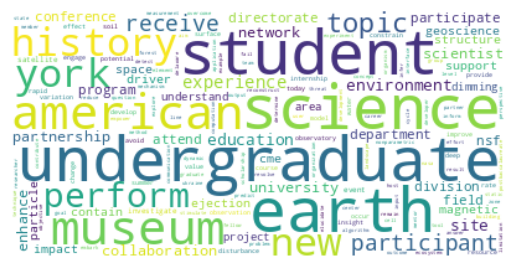

In [105]:
# Appending all the words in the vocabulary to match the input format of the wordcloud module
vocabulary = ' '.join(vocabulary_).lower()

# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### TF-IDF

#### Entire Dataset - both years

In [106]:
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words=all_stopwords)

# Creating sparse DTM
awards_TFIDF = tfidf_vect.fit_transform(awards['Abstract'])

# Storing the DTM in pandas dataframe
awards_TFIDF = pd.DataFrame(awards_TFIDF.toarray())

# Setting the column/feature names as document terms
awards_TFIDF.columns = tfidf_vect.get_feature_names_out()

awards_TFIDF

,aa,aaai,aaas,aacus,aamas,aar,aaron,aarp,aas,aasaans,...,zplane,zplanes,zpolarized,zr,zrbased,zworski,zürich,µm,école,études
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
freqList = awards_DTM.sum(axis=0)

len(freqList)

24986

In [108]:
# Summarize word importance from the new TF-IDF DTM by summing
# the TF-IDF values for that word across all documents.
tfidfList = awards_TFIDF.sum(axis=0)
tfidfList

,0
aa,0.211474
aaai,1.322393
aaas,0.219745
aacus,0.122627
aamas,0.437806
...,...
zworski,0.066185
zürich,0.049497
µm,0.323449
école,0.043703


In [111]:
compare_DF = pd.concat([freqList, tfidfList], axis=1)
compare_DF.columns = ["Frequency", "TF-IDF"]
compare_DF

,Frequency,TF-IDF
aa,3,0.211474
aaai,16,1.322393
aaas,3,0.219745
aacus,2,0.122627
aamas,5,0.437806
...,...,...
zworski,1,0.066185
zürich,1,0.049497
µm,5,0.323449
école,1,0.043703


In [112]:
compare_sorted = compare_DF.sort_values(by="TF-IDF", ascending=False)

In [114]:
compare_sorted
# This work on the TF-IDF is very very helpful! It looks like I still have some data cleaning to do, see "br" and "ha"

,Frequency,TF-IDF
project,6545,76.212543
research,5773,73.141165
student,3292,51.742697
br,4672,49.770667
data,2288,45.705010
...,...,...
adaptdeliver,1,0.023746
waterloving,1,0.023746
waterhating,1,0.023746
drugs,1,0.023746


In [157]:
# split processed data by year for TF-IDF comparison
awards['Year'] = pd.to_numeric(awards['Year'], errors='coerce')

awards_2024 = awards[awards['Year'] == 24]
awards_2025 = awards[awards['Year'] == 25]

#### TF-IDF by Year

In [170]:
vectorizer_2024 = TfidfVectorizer(stop_words=all_stopwords, lowercase=True)
tfidf_2024 = vectorizer_2024.fit_transform(awards_2024['Abstract'].fillna(''))
terms_2024 = vectorizer_2024.get_feature_names_out()
df_2024 = pd.DataFrame(tfidf_2024.toarray(), columns=terms_2024)

vectorizer_2025 = TfidfVectorizer(stop_words=all_stopwords, lowercase=True)
tfidf_2025 = vectorizer_2025.fit_transform(awards_2025['Abstract'].fillna(''))
terms_2025 = vectorizer_2025.get_feature_names_out()
df_2025 = pd.DataFrame(tfidf_2025.toarray(), columns=terms_2025)

In [174]:
# Compare Means
mean_tfidf_2024 = df_2024.mean().sort_values(ascending=False)
mean_tfidf_2025 = df_2025.mean().sort_values(ascending=False)

compare_by_year = pd.DataFrame({
    'TF-IDF 2024': mean_tfidf_2024,
    'TF-IDF 2025': mean_tfidf_2025
}).fillna(0)

compare_by_year['Abs Difference'] = (compare_by_year['TF-IDF 2025'] - compare_by_year['TF-IDF 2024']).abs()
compare_by_year.sort_values(by='Abs Difference', ascending=False).head(100)

,TF-IDF 2024,TF-IDF 2025,Abs Difference
fellowship,0.000254,0.015508,0.015254
sponsoring,0.000101,0.010536,0.010435
host,0.002992,0.012118,0.009126
student,0.029339,0.021331,0.008008
scientist,0.006998,0.014572,0.007574
...,...,...,...
held,0.002041,0.004163,0.002121
community,0.013662,0.011559,0.002103
curriculum,0.005579,0.003487,0.002091
graph,0.004844,0.006932,0.002089


In [173]:
# Compare Sums
sum_tfidf_2024 = df_2024.sum().sort_values(ascending=False)
sum_tfidf_2025 = df_2025.sum().sort_values(ascending=False)

compare_by_year = pd.DataFrame({
    'TF-IDF 2024': sum_tfidf_2024,
    'TF-IDF 2025': sum_tfidf_2025
}).fillna(0)

compare_by_year['Abs Difference'] = (compare_by_year['TF-IDF 2025'] - compare_by_year['TF-IDF 2024']).abs()
compare_by_year.sort_values(by='Abs Difference', ascending=False).head(100)

,TF-IDF 2024,TF-IDF 2025,Abs Difference
student,35.940027,16.787247,19.152780
research,45.983134,29.339688,16.643445
project,46.872977,31.506570,15.366407
program,25.343333,13.251704,12.091629
fellowship,0.311690,12.205105,11.893415
...,...,...,...
building,7.583464,3.128649,4.454815
concept,6.865041,2.494421,4.370620
graduate,12.074934,7.754068,4.320866
surface,9.247512,4.944293,4.303218
